# Data Scientist Associate Practical Exam Submission

## Task 1 
The dataset contains **1500 rows and 8 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:
 - booking_id: Same as description without missing values.
 - months_as_member: Same as description without missing values.
 - weight: 20 missing values, so i replace missing values with overall average weight as instructed.
 - days_before: No missing values, I removed "days" from the column and I convert it to integar data type.
 - day_of_week: No missing values and I replaced inconsistent data inputs.
 - time: Same as description without missing values.
 - category: No missing values and i replaced the wrong data input with 'unknown' as instructed.
 - attended: Same as description without missing values.
 
After the data validation, the dataset contains **1500 rows and 8 columns.**

### Original dataset

In [59]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np

df = pd.read_csv("fitness_class_2212.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [60]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


### Validate the categorical variables

In [61]:
cats = ['time','category','day_of_week', 'days_before']

for column in cats:
    print(df[column].value_counts())
    print()
    

AM    1141
PM     359
Name: time, dtype: int64

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64

Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64

10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64



In [62]:
df[cats].isna().sum()

time           0
category       0
day_of_week    0
days_before    0
dtype: int64

### Cleaning day_of_week column

In [63]:
# Replacing wrong and inconsistent input with consistent ones
replacement_dict = {'Fri.': 'Fri', 
                   'Wednesday': 'Wed',
                   'Monday':'Mon'}

df['day_of_week'] = df['day_of_week'].replace(replacement_dict)

df['day_of_week'].value_counts()

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

### Cleaning category column

In [64]:
# replacing '-' with unknown 
df['category'] = df['category'].str.replace('-', 'unknown')

df['category'].value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64

### Validate the numerical variables

In [65]:
# printing the stats of the numerical column
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [66]:
df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

### Cleaning weight column

In [67]:
# replacing missing values with overall mean weight
df['weight'] = df['weight'].fillna(np.mean(df['weight']))

### Cleaning days_before column

In [68]:
# removing unwanted sting 'days'
df['days_before'] = df['days_before'].str.replace(" days", "")

# removing excess whitespaces
df['days_before'] = df['days_before'].str.strip()

#converting the column to integar data type
df['days_before'] = df['days_before'].astype('int')

In [69]:
df['days_before'].value_counts()

10    299
2     200
8     195
12    181
14    175
4     157
6      73
7      39
3      32
5      31
13     26
11     26
9      24
15     24
1      10
16      3
17      3
20      1
29      1
Name: days_before, dtype: int64

### Final dataset

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB


In [71]:
df.describe()

,booking_id,months_as_member,weight,days_before,attended
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,15.628667,82.610378,8.346667,0.302667
std,433.157015,12.926543,12.680411,4.077938,0.459565
min,1.000000,1.000000,55.410000,1.000000,0.000000
25%,375.750000,8.000000,73.562500,4.000000,0.000000
50%,750.500000,12.000000,81.035000,9.000000,0.000000
75%,1125.250000,19.000000,89.382500,12.000000,1.000000
max,1500.000000,148.000000,170.520000,29.000000,1.000000


## Task 2

From  **Plot 2 Number of Bookings that Attended the Class**, over 1000 bookings were not attended and less than 450 attended. We can see attendance is less than half of non-attendance.

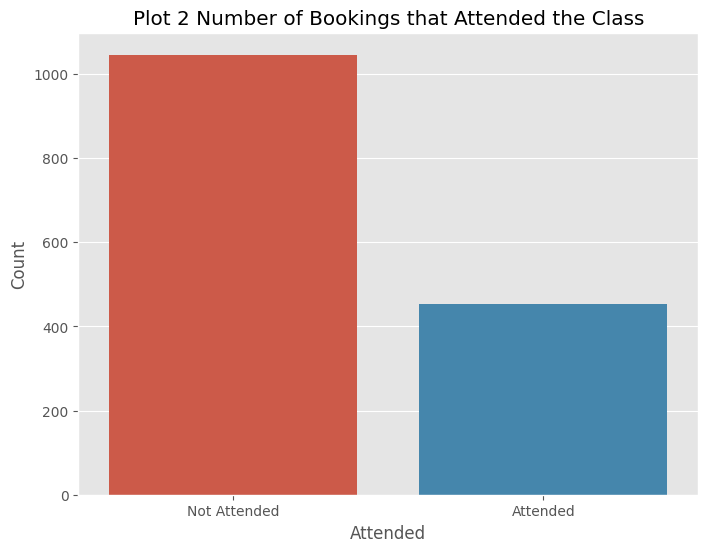

In [72]:
# set visual style
style.use('ggplot')

# Create a bar plot to show the number of bookings attended the class
plt.figure(figsize=(8, 6))
sns.countplot(x='attended', data=df)

# Set titles
plt.title('Plot 2 Number of Bookings that Attended the Class')
plt.xlabel('Attended')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Attended', 'Attended'])

plt.show()

## Task 3
From **Plot 3-1 The Distribution of Number of Reviews**, we can see the distribution is right-skewed. From the distribution, we can infer
- The majority of data points are concentrated on the left side of the distribution, while the tail extends towards the right. The gym has higher count of newer members than old members.
- The mean is greater than the median, and there are some outliers on the right side of the distribution.

We can see an outlier larger than 140kg. Simply removing does not affect the distribution,  we decided to log transformation. From **Plot 3-2**, we can see the distribution is much closer to a normal distribution.

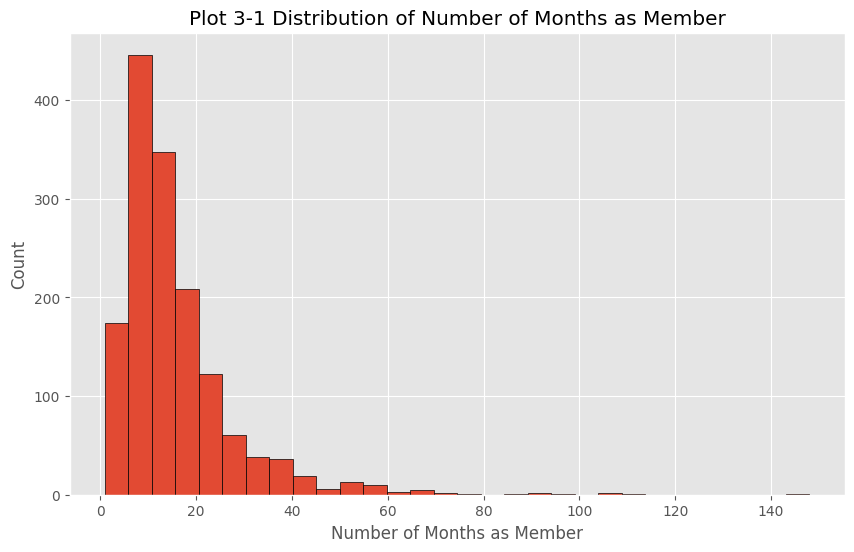

In [73]:
# set visual style
style.use('ggplot')

# Extract the 'Months_as_member' column
months_as_member = df['months_as_member']

# Create a histogram to visualize the distribution of the number of months as a member
plt.figure(figsize=(10, 6))
plt.hist(months_as_member, bins=30, edgecolor='black')
plt.xlabel('Number of Months as Member')
plt.ylabel('Count')
plt.title('Plot 3-1 Distribution of Number of Months as Member')
plt.show()

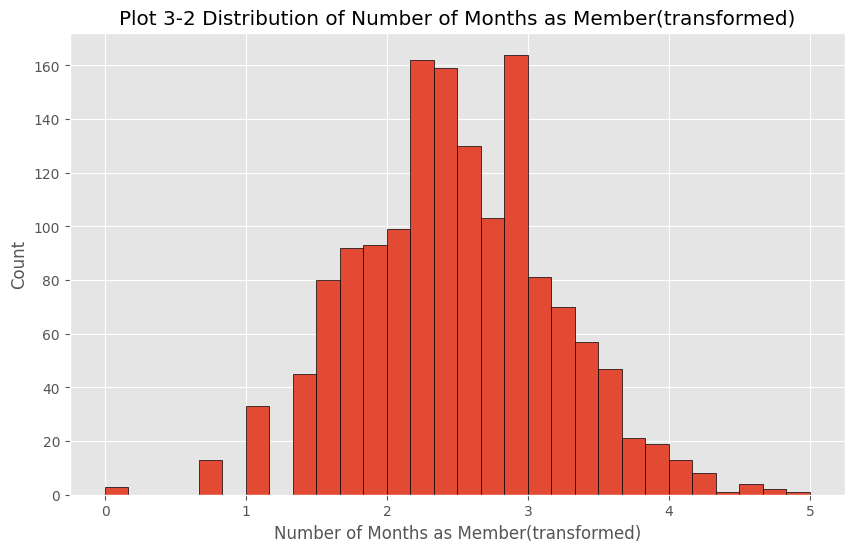

In [74]:
# set visual style
style.use('ggplot')

# Extract the 'Months_as_member' column
months_as_member = df['months_as_member']

# Create a histogram to visualize the distribution of the transformed number of months as a member
plt.figure(figsize=(10, 6))
plt.hist(np.log(months_as_member), bins=30, edgecolor='black')
plt.xlabel('Number of Months as Member(transformed)')
plt.ylabel('Count')
plt.title('Plot 3-2 Distribution of Number of Months as Member(transformed)')
plt.show()

## Task 4
From **Plot 4-1 The Relationship between Attendance and Number of Months as Member**, there is one outlier of a very old member of more than 140 months(more than 11 years). After removing that outlier in **Plot 4-2** we can see
- Attendance was recorded for members older than 20 months on average.
- Non-attendace was recorded for members newer than than 15 months on average

From **Plot 2** above we know more than 1000 did not attend their class and less than 450 attended their class. In combination with **Plot 4-2**, without considering outliers we can infer:
- Less than 450 attendance was recorded for old members ranging from around 2 months to 55 months.
- More than 1000 non-attendance was recorded for newer members ranging around from 1 month to 22 months.

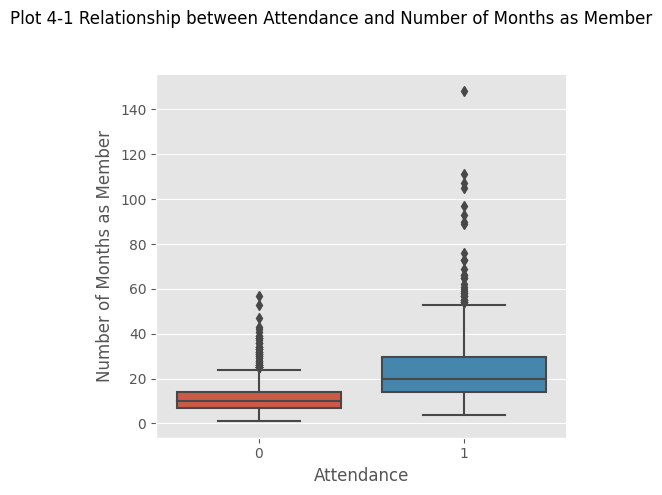

In [75]:
# Create a boxxplot to visualise relationship
g = sns.catplot(x='attended',
                y='months_as_member',
                data = df,
                kind='box',
               )

# Customize the subplot
g.set_axis_labels('Attendance', 'Number of Months as Member')
g.fig.suptitle('Plot 4-1 Relationship between Attendance and Number of Months as Member')
plt.subplots_adjust(top=0.85)
plt.show()

In [76]:
outlier = df['months_as_member'] == df['months_as_member'].max()
df_remove = df[~outlier]

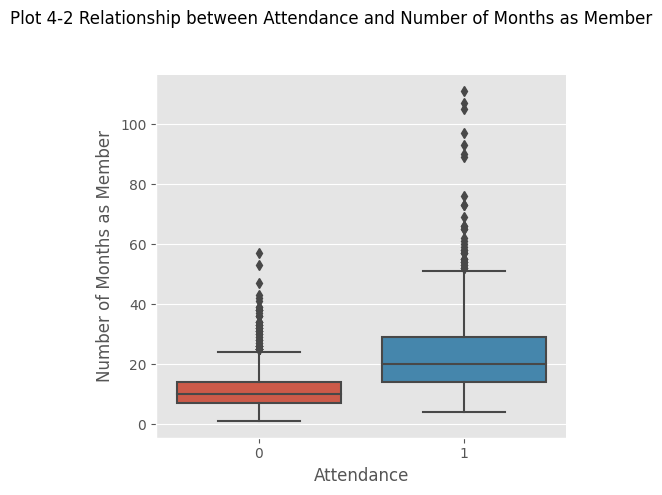

In [77]:
g = sns.catplot(x='attended',
                y='months_as_member',
                data = df_remove,
                kind='box'
               )

# Customize the subplot
g.set_axis_labels('Attendance', 'Number of Months as Member')
g.fig.suptitle('Plot 4-2 Relationship between Attendance and Number of Months as Member')
plt.subplots_adjust(top=0.85)
# g.set_titles('Plot 4-2 Relationship between Attendance and Number of Months as Member')
plt.show()

## Task 5
The business wants to predict whether members will attend using the provided data. This is a classification machine learning problem.  Classification algorithms will be used to learn patterns and relationships in the data from past attendance records and then use this knowledge to predict whether future members are likely to attend a class or not.

The task is to build predictive models that takes the input features such as "Months_as_member," "Weight," "Days_before," "day_of_week," "time," and "Category" and predicts the corresponding class label (0 or 1) for non-attendace or attendance.

In [78]:
#import ML models and peformance metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

### Preprocessing dataset for modelling
- Dropped the 'booking_id' column since it is just a unique identifier.
- Dropped outliers in months_as_member and weight column column.
- Encoded the catgorical columns category, time and day_of_week.
- Checked for class imbalance in target variable.

In [79]:
# dropping the booking id column since it is just a unique identifier of the booking.
df.drop(columns=['booking_id', ], inplace=True)

# dropping outliers in months_as_member column.
outlier1 = df['months_as_member'] == df['months_as_member'].max()
df = df[~outlier1]

# dropping outliers in weight column.
outlier2 = df['weight'] == df['weight'].max()
df = df[~outlier]

#Reset index
df = df.reset_index(drop=True)

### Encoding categprical columns

In [80]:
# Encoding categprical columns
df = pd.get_dummies(df, columns = ['category', 'time', 'day_of_week'])

### Splitting dataset into input features and target variable

In [81]:
# Separate features (X) and target variable (y)
X = df.drop('attended', axis=1)
y = df['attended']

### Checking for class imbalance in the target variable. 
As seen below there is class imbalance, as there are more non-attendance(approx 70%) than attendance(approx 30%).

In [82]:
# Calculating the proportion of attendance(1) and non-attendance(0)
y.value_counts(normalize=True)

0    0.697799
1    0.302201
Name: attended, dtype: float64

### Splitting dataset into train and test
This helps to avoid overfitting on the dateset. We have use the stratify argument to resolve the class imbalance observed in the target variable, this makes sure the train and test set get the same ratio of non-attendance and attendance as observed below.

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=19)

# Verifying the target variable test and train set has the same proportion of attendance and non-attendance
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

0    0.698082
1    0.301918
Name: attended, dtype: float64

0    0.696667
1    0.303333
Name: attended, dtype: float64


## Task 6
Baseline Model - Logistic Regression

In [84]:
# creating the baseline model
baseline_model = LogisticRegression(random_state=19)

# fitting the baseline model
baseline_model.fit(X_train, y_train)

LogisticRegression(random_state=19)

## Task 7
Comparison Model - Random Forest Classifier

In [85]:
# creating the comparison model
comparison_model = RandomForestClassifier(random_state=19)

# fitting the comparison model
comparison_model.fit(X_train, y_train)

RandomForestClassifier(random_state=19)

## Task 8
**Logistic Regression** is a simple and interpretable algorithm that is commonly used for binary classification problems like this. **Random Forest Classifier** is a more advanced and powerful ensemble learning algorithm that can capture complex relationships in the data and is less likely to overfit compared to a single logistic regression model.

## Task 9
I am choosing to use the **ROC_AUC_SCORE** to evaluate the model since the accuracy of both models is approximately the same. it measures how well a model can distinguish between two outomes (non-attendance and attendance) based on its predictions.

### Evaluating the Logistic Regression model

In [86]:
# Predict on the test data
y_pred = baseline_model.predict(X_test)

# Calculate accuracy
accuracy_base = accuracy_score(y_test, y_pred)
print("Accuracy of the baseline logistic regression model:", accuracy_base)

# Calculate roc_auc score
print('ROC SCORE')
print(roc_auc_score(y_test, y_pred))

Accuracy of the baseline logistic regression model: 0.79
ROC SCORE
0.6848677638151323


### Evaluating the Random Forest model

In [87]:
# Predict on the test data
y_prob_comparison = comparison_model.predict(X_test)

# Calculate accuracy
accuracy_comp = accuracy_score(y_test, y_prob_comparison)
print("Accuracy of the comparison Random Forest Classifier model:", accuracy_comp)

# Calculate roc_auc score
print('ROC SCORE')
print(roc_auc_score(y_test, y_prob_comparison))

Accuracy of the comparison Random Forest Classifier model: 0.79
ROC SCORE
0.7189915347810084


## Task 10
A higher ROC score generally indicates a better performing model.

Theerefore **Random Forest Classifier** is better at predicting attendance/Non-attendance than Logistic regression.